In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1['location'].nunique()

1305

### EDA

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
# Let's check the dist of area types 

In [7]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
# another way
#df1.groupby('area_type')['area_type'].agg('count')
df1.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df1.area_type.nunique()

4

In [10]:
df1.location.nunique()

1305

In [11]:
# Dropping uneccessary columns
df2 = df1.drop(['society','availability','balcony','area_type'], axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Cheking null values

In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
# Location

In [14]:
df2[df2.location.isnull()]

,location,size,total_sqft,bath,price
568,NaN,3 BHK,1600,3.0,86.0


In [15]:
df2.location.mode()

0    Whitefield
dtype: object

In [16]:
#df2.dropna(subset=['location'], inplace=True)

In [17]:
df2.isnull().sum() / len(df2) * 100

location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64

In [18]:
df2[df2['size'].isnull()]

,location,size,total_sqft,bath,price
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185
1775,IVC Road,NaN,2000 - 5634,NaN,124.000
2264,Banashankari,NaN,2400,NaN,460.000
2809,Sarjapur Road,NaN,1200 - 2400,NaN,28.785
2862,Devanahalli,NaN,1500 - 2400,NaN,46.800
5333,Devanahalli,NaN,2100 - 5405,NaN,177.115
6423,Whitefield,NaN,2324,NaN,26.730
6636,Jigani,NaN,1500,NaN,25.490
6719,Hoskote,NaN,800 - 2660,NaN,28.545
7680,Kasavanhalli,NaN,5000,NaN,400.000


In [19]:
df2[df2['bath'].isnull()].tail(50)

,location,size,total_sqft,bath,price
3370,Kanakpura Road,3 BHK,1430 - 1630,NaN,66.400
3544,Hennur Road,3 BHK,1482 - 1846,NaN,93.865
3598,Haralur Road,4 BHK,2805 - 3565,NaN,175.000
3862,Jigani,4 Bedroom,3293 - 5314,NaN,226.000
4210,Malleshwaram,3 BHK,2215 - 2475,NaN,293.000
4346,Whitefield,3 BHK,1650 - 2538,NaN,113.190
4843,Bhoganhalli,4 BHK,1974 - 2171,NaN,111.000
4894,Bommanahalli,3 BHK,1360 - 1890,NaN,87.720
4995,Hebbal,3 BHK,2466 - 2856,NaN,226.500
5333,Devanahalli,NaN,2100 - 5405,NaN,177.115


### So all the rows that have the size and bath as missing also have the balcony as missing value.

So if we drop the rows with balcony as missing value we will also have other missing values removed as well.

In all we lose 4.5% of all the data, which is acceptable

In [20]:
df3 = df2.dropna()
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [21]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#### Null values are removed !!!

In [22]:
df3.shape

(13246, 5)

### Exploring columns and additional EDA

##### 1. Size

In [23]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [24]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
df3['size'].apply(lambda x: int(x.split(" ")[0]))

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13246, dtype: int64

In [26]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-26-cf42672af11e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))


In [27]:
df3.drop('size',axis=1, inplace=True)

C:\Users\Karthik\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [29]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [30]:
df3[df3['bhk']> 20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


We can see above that there is a error in data, a house cannot have 43 bedrooms and just 2400sqft area

##### 2.total_sqft

In [31]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [32]:
# We can see some values in the col are range type of values like 1133-1384

# lets check all such rows

In [33]:
def is_float(df):
    try:
        float(df)
    except:
        return False
    return True

In [34]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [35]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [36]:
# We can see there are lot of non uniformities in this column

# We will deal with by changing the values

In [37]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [38]:
convert_sqft_to_num('2144')

2144.0

In [39]:
convert_sqft_to_num('2100 - 2850') 

2475.0

In [40]:
convert_sqft_to_num('34.46Sq. Meter') 

In [41]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [42]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 620.9+ KB


In [43]:
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

### At this point we have a much better cleaned and uniform dataset, without null values and cases like above

In [44]:
df4['location'].nunique()

1304

### Feature engg & dimensionality reduction

In [45]:
df5 = df4.copy()
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


**We will create a new label called "price_per_sqft".**

We know price_per_sqft is really imp in such use cases.

Later it will help us in outlier detection and detection

In [46]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] # *100000 because the price in lakh rupees
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [47]:
df5['location'].nunique()

1304

Since we have so many unique locations, getting all of them ohe encoded will give 1265 more columns, which i like too many features.

This is called dimensionality curse

**Curse of Dimensionality** describes the explosive nature of increasing data dimensions and its resulting exponential increase in computational efforts required for its processing and/or analysis

To overcome such problems we will add another value called **"other"** in the location columns.

That is, there will be only one row/data point for most of the locations.

For such location we will put the location as **"other"**.

In [48]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                                  535
Sarjapur  Road                              392
Electronic City                             304
Kanakpura Road                              266
Thanisandra                                 236
                                           ... 
Chowdeshwari Layout                           1
Garden Layout                                 1
Seethappa Layout                              1
Okalipura                                     1
Ramaswamy Palya - Kammanahalli Main Road      1
Name: location, Length: 1293, dtype: int64

In [49]:
# df5.location = df5.location.apply(lambda x: x.strip())

In [50]:
# location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
# location_stats

In [51]:
location_stats.values.sum()

13246

In [52]:
len(location_stats[location_stats>10])

241

In [53]:
len(location_stats)

1293

In [54]:
location_stats[location_stats<=10].shape

(1052,)

There are 1017 locations which have less than or equal to 10 rows/data points in our dataset.

In [55]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Sector 1 HSR Layout                         10
Dodsworth Layout                            10
Basapura                                    10
Gunjur Palya                                10
Dairy Circle                                10
                                            ..
Chowdeshwari Layout                          1
Garden Layout                                1
Seethappa Layout                             1
Okalipura                                    1
Ramaswamy Palya - Kammanahalli Main Road     1
Name: location, Length: 1052, dtype: int64

In [56]:
len(df5.location.unique())

1293

In [57]:
# df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
# len(df5.location.unique())

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [58]:
df5.location.nunique()

242

In [59]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


## 4.Outlier Removal Using Business Logic

**In real estate, normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [60]:
df5[df5['total_sqft']/df5['bhk']<300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [61]:
# So above data points are outliers/anomalies and we can safely remove them

In [62]:
df5.shape

(13246, 6)

In [63]:
df6 = df5[~(df5['total_sqft']/df5['bhk']<300)]
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [64]:
df6.shape

(12502, 6)

In [65]:
# outliers of above case removed

In [66]:
# Now price_per_sqft

In [67]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

It is very unlikely to get a property with 267 rs per sqft in Bengaluru and also at the same time for the maximum value, 176470, is too high and possible in areas of high value, but we will remove these outliers to build a generic model.

So we are going to remove data points beyond 1 Standard Deviation(68% data lies in 1 S.D.)

In [68]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [69]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 6)

In [70]:
# Done

**Let's check how the prices of given property based on the no of bedrooms are like**

In [71]:
df7.bhk.nunique()

13

In [72]:
df7.bhk.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13], dtype=int64)

In [73]:
df7.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.666667


In [74]:
def plot_scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+',color='green', label='3 BHK', s=50)
    plt.xlabel("Total Sqft area")
    plt.ylabel("Price (Indian lakh rupees)")
    plt.title(location)
    plt.legend()

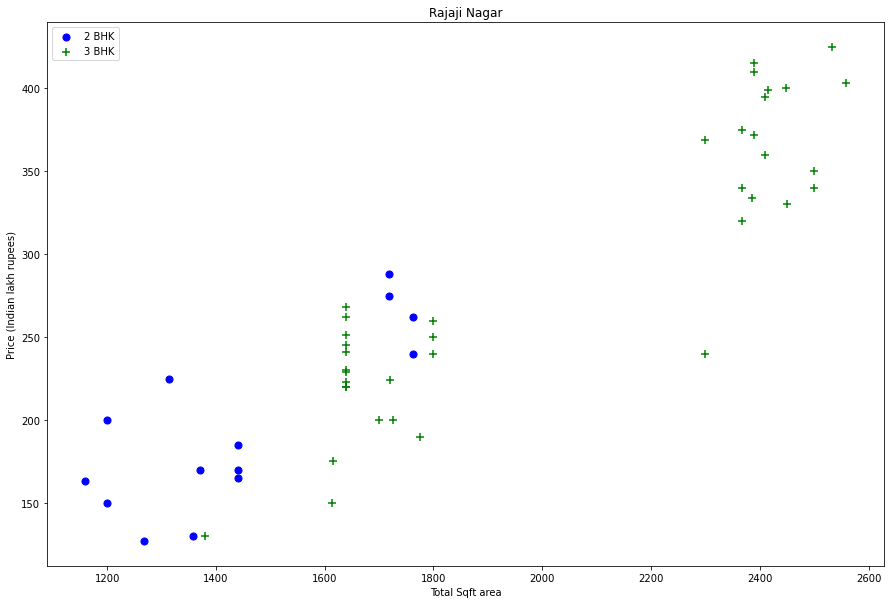

In [75]:
plot_scatter_plot(df7, "Rajaji Nagar")

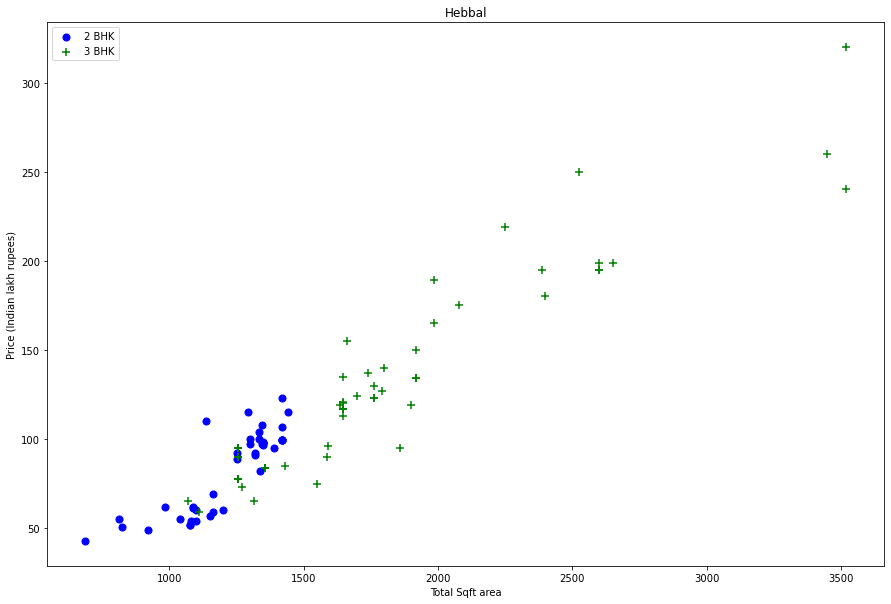

In [76]:
plot_scatter_plot(df7, "Hebbal")

We can see that for the same location for same total_sqft_area the prices of 3bhk apartments are lower than 2BHK aprartments. We wil remove these data points.

**What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}


Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [77]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [78]:
# def remove_bhk_outliers(df):
#     exclude_indices = np.array([])
#     for location , location_df in df.groupby('location'):
#         bhk_stats = {}
#         for bhk, bhk_df in location_df.groupby('bhk'):
#             bhk_stats[bhk]={
#                             'mean': np.mean(bhk_df.price_per_sqft),
#                             'std': np.std(bhk_df.price_per_sqft),
#                             'count': bhk_df.shape[0] 
#                            }
#         for bhk, bhk_df in location_df.groupby('bhk'):
#             stats = bhk_stats.get(bhk-1)
#             if stats and stats.get(bhk-1):
#                 exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].inde.values)
#         return df.drop(exclude_indices, axis='index')

In [79]:
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 6)

In [80]:
# Again plot and see if outliers are removed

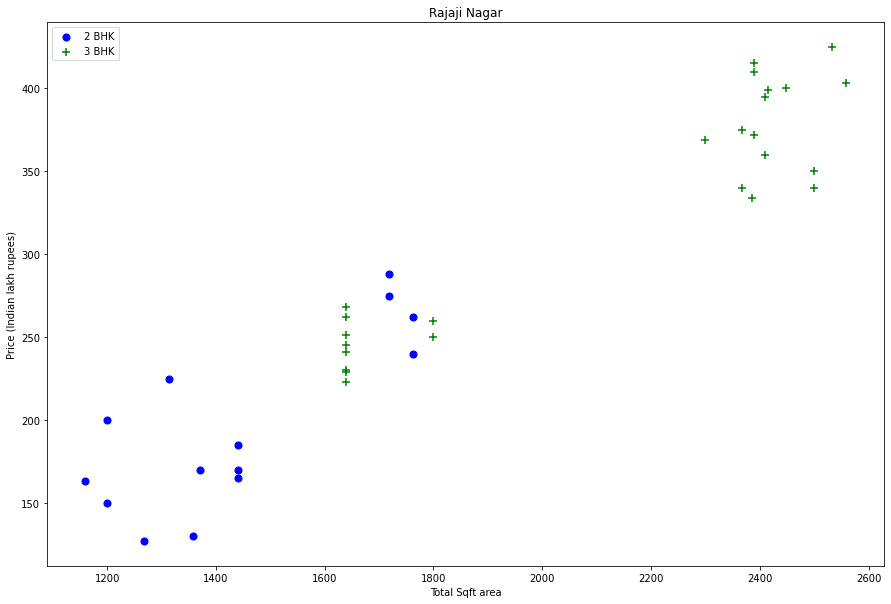

In [81]:
plot_scatter_plot(df8,"Rajaji Nagar")

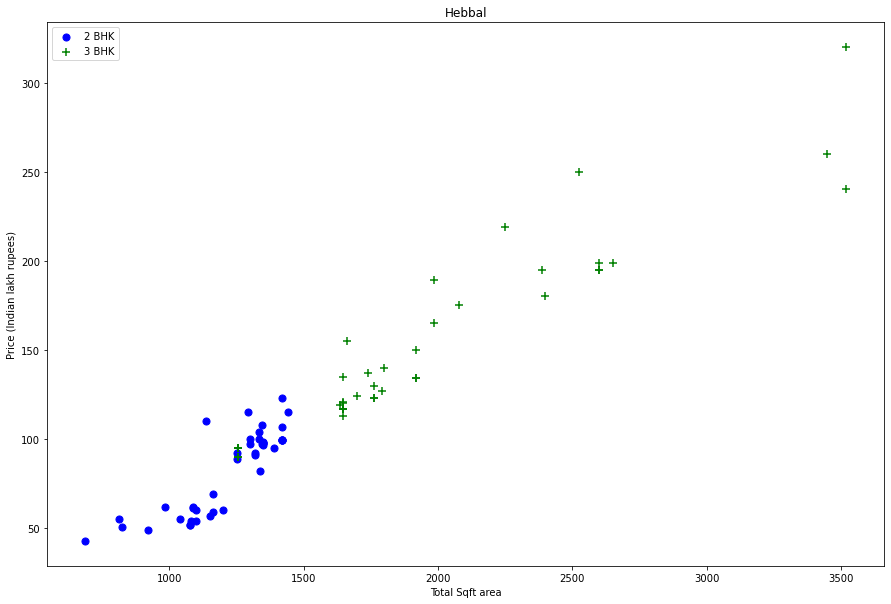

In [82]:
plot_scatter_plot(df8,"Hebbal")

Based on above charts we can say that the outliers are have been removed due to remove_bhk_outliers function. 

Still we can see some anomalies/outliers are still present, which will be difficult to remove and presence of a few anomalies is ok.

In [83]:
# Let's see hpw many apartments we have in per squarefoot area.

Text(0, 0.5, 'Count')

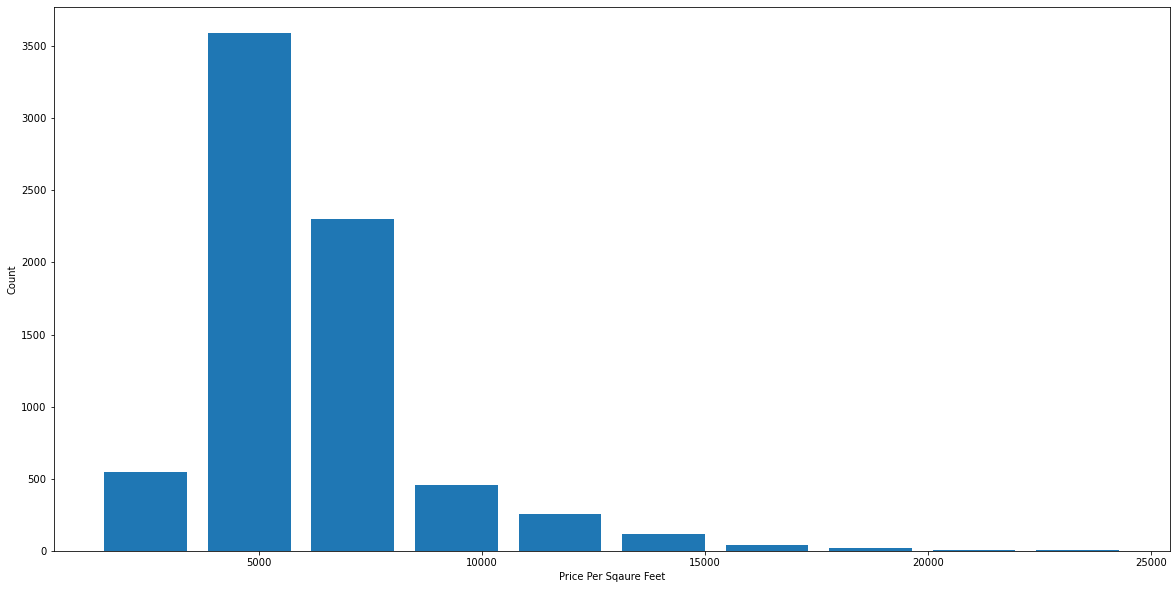

In [84]:
plt.figure(figsize=(20,10))
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Sqaure Feet")
plt.ylabel("Count")

We can see that in 0-10000 rs/sqft range we have majority of the data points. This is like a normal distribution.

In [85]:
df8.price_per_sqft.min()

1300.0

In [86]:
df8.price_per_sqft.max()

24509.803921568626

#### Outlier Removal using Bathroom feature

In [87]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [88]:
df8[df8.bath > 10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

Text(0, 0.5, 'Count')

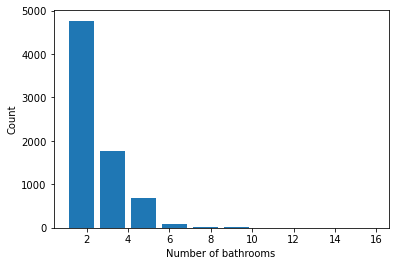

In [89]:
#plt.figure(figsize=(8,7))
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [90]:
df8[df8['bath']>df8['bhk']+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [91]:
#df9 = df8[df8['bath']<=df8['bhk']+1]
df9 = df8[df8['bath']<=df8['bhk']+1]
df9

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,5833.333333
10233,other,1800.0,1.0,200.0,1,11111.111111
10236,other,1353.0,2.0,110.0,2,8130.081301
10237,other,812.0,1.0,26.0,1,3201.970443


In [92]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

In [93]:
df9.bhk.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 11, 16, 10, 13], dtype=int64)

In [94]:
df10 = df9.drop('price_per_sqft', axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [95]:
df10.shape

(7251, 5)

In [96]:
df10[df10.bhk>10]

,location,total_sqft,bath,price,bhk
8026,other,5000.0,9.0,360.0,11
8575,other,10000.0,16.0,550.0,16
9308,other,6000.0,12.0,150.0,11
9639,other,5425.0,13.0,275.0,13


### One Hot Encoding

In [97]:
# df11 = pd.get_dummies(df10, drop_first=True)
# df11
######################

# dummies_area_type = pd.get_dummies(df10.area_type)
# dummies_area_type.columns

In [98]:
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [99]:
dummies_location = pd.get_dummies(df10.location)
dummies_location

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
len(dummies_location.columns)

242

In [101]:
# df_dummies = pd.concat([dummies_area_type.drop('Super built-up  Area',axis=1),dummies_location.drop('other', axis=1)],axis=1)
# df_dummies

In [102]:
df11 = pd.concat([df10.drop(['location'],axis=1),dummies_location.drop('other', axis=1)], axis=1)
df11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df11.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

### Model Building

In [104]:
X = df11.drop('price',axis=1)
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
y = df11['price']
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [107]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression()

In [108]:
preds = lr_clf.predict(X_test)

In [109]:
preds

array([ 85.55120614, 107.10977033,  43.39161223, ..., 410.94748492,
       109.58417873,  67.28499603])

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [111]:
r2_score(y_test, preds)

0.8401955594009297

In [112]:
lr_clf.score(X_test, y_test)

0.8401955594009297

### Use K Fold cross validation to measure accuracy of our LinearRegression model
We'll now use K-fold cross validation

In [113]:
# K-fold cross validation
from sklearn.model_selection import ShuffleSplit, cross_val_score

# K=5 folds
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # Randomnly shuffling the data samples so that each fold has equal dist of data samples

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

We can see that in 5 iterations we get a score above 80% in 4 cases. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### GridSearchCV

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [115]:
def find_best_model_using_gridsearchcv(X,y):
    algorithms = {
        'linear_regression':{'model': LinearRegression(),
                             'params':{'normalize': [True,False]
                                      }
                            },
        'lasso':{'model': Lasso(),
                 'params': {'alpha': [1,2],
                            'selection': ['random', 'cyclic']
                           }
                },
        'decision_tree':{'model': DecisionTreeRegressor(),
                         'params': {'criterion': ['mse','friedman_mse'],
                                    'splitter': ['best','random']
                                   }
                        },
        'random_forest':{'model': RandomForestRegressor(),
                         'params':{'n_estimators': [10,15]
                                  }
                        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algorithms.items():
        grid_cv_model = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=cv, return_train_score=False)
        grid_cv_model.fit(X,y)
        
        scores.append({
            'Model': algo_name, 
            'Best_Score': grid_cv_model.best_score_, 
            'Best_parameters': grid_cv_model.best_params_
        })
        
    return pd.DataFrame(scores, columns=['Model', 'Best_Score','Best_parameters'])

find_best_model_using_gridsearchcv(X,y)

,Model,Best_Score,Best_parameters
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687459,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.720877,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_forest,0.777759,{'n_estimators': 10}


Based on above results we can see that the **Linear Regression** model gives us the best results.

In [116]:
def predict_house_price(location, sqft, bath, bhk):
    #area_index = np.where(X.columns==area_type)[0][0]
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
#     if area_index.size >= 1:
#         x[int(area_index)] = 1
    
    if loc_index.size >= 1:
        x[int(loc_index)] = 1
   
    return lr_clf.predict([x])[0]

predict_house_price('Indira Nagar',1000, 3, 3)

195.97489932364567

In [117]:
predict_house_price('Indira Nagar',1000, 2, 2)

194.39210831590012

In [118]:
predict_house_price('Indira Nagar',1000, 1, 1)

192.8093173081546

In [119]:
predict_house_price('1st Phase JP Nagar',1000, 1, 1)

83.68799711183478

In [120]:
predict_house_price('1st Phase JP Nagar',1000, 2, 2)

85.27078811958032

In [121]:
predict_house_price('1st Phase JP Nagar',1000, 3, 3)

86.85357912732587

In [ ]:
x = np.zeros(len(X.columns))

In [ ]:
x

In [ ]:
location = '1st Phase JP Nagar'
loc_index = np.where(X.columns==location)[0][0]
loc_index

In [ ]:
X.columns

In [ ]:
area_type = 'Built-up  Area'
area_index = np.where(X.columns==area_type)[0]
area_index 

In [ ]:
type(area_index )

In [ ]:
if area_index:
    print(True)
else:
    print(False)

In [ ]:
area_index.size > 0

In [ ]:
area_index

### Export the tested model to a pickle file

In [ ]:
import pickle
with open('real_estate_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))